In [1]:
import heapq
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

# Задача классификации текстов

Задача классификации текстов заключается в том, чтобы определить по документу его класс.
В данном случае предлагается рассмотреть в качестве документов - письма, заранее отклассифицированных по 20 темам.

In [2]:
all_categories = fetch_20newsgroups().target_names
all_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Возьмём всего 3 темы, но из одного раздела (документы из близких тем сложнее отличать друг от друга)

In [3]:
categories = [
    'sci.electronics',
    'sci.space',
    'sci.med'
]

train_data = fetch_20newsgroups(subset='train',
                                categories=categories,
                                remove=('headers', 'footers', 'quotes'))

test_data = fetch_20newsgroups(subset='test',
                               categories=categories,
                               remove=('headers', 'footers', 'quotes'))

## Векторизация текстов
**Вопрос: как описать текстовые документы пространством признаков?**


**Идея №1**: мешок слов (bag-of-words) - каждый документ или текст выглядит как неупорядоченный набор слов без сведений о связях между ними.
<img src='https://st2.depositphotos.com/2454953/9959/i/450/depositphotos_99593622-stock-photo-holidays-travel-bag-word-cloud.jpg'>

**Идея №2**: создаём вектор "слов", каждая компонента отвечает отдельному слову.

Для векторизации текстов воспользуемся [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Можно всячески варировать извлечение признаков (убирать редкие слова, убирать частые слова, убирать слова общей лексики, брать биграмы и т.д.)

In [159]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [160]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [161]:
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2)  ) 

In [162]:
word = {}
for sent in train_data.data:
    words = sent.split(" ")
    if()

SyntaxError: invalid syntax (<ipython-input-162-560651a5b59a>, line 4)

In [139]:
stre = sorted(count_vectorizer.vocabulary_.items() , key = lambda x : x[1]) 

In [163]:
count_vectorizer.vocabulary_.items()

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

In [141]:
stre 

[('00', 0),
 ('00 and', 1),
 ('000', 2),
 ('000 000', 3),
 ('000 feet', 4),
 ('000 to', 5),
 ('01', 6),
 ('01 14', 7),
 ('02', 8),
 ('03', 9),
 ('04', 10),
 ('04 01', 11),
 ('05', 12),
 ('06', 13),
 ('07', 14),
 ('08', 15),
 ('09', 16),
 ('10', 17),
 ('10 00', 18),
 ('10 000', 19),
 ('10 15', 20),
 ('10 20', 21),
 ('10 30', 22),
 ('10 of', 23),
 ('10 or', 24),
 ('10 to', 25),
 ('10 years', 26),
 ('100', 27),
 ('100 000', 28),
 ('100 or', 29),
 ('1000', 30),
 ('101', 31),
 ('102', 32),
 ('104', 33),
 ('11', 34),
 ('110', 35),
 ('111', 36),
 ('115', 37),
 ('1174', 38),
 ('1174 intergraph', 39),
 ('12', 40),
 ('120', 41),
 ('1200', 42),
 ('121', 43),
 ('125', 44),
 ('128', 45),
 ('129', 46),
 ('12v', 47),
 ('13', 48),
 ('130', 49),
 ('135', 50),
 ('14', 51),
 ('14 39', 52),
 ('147', 53),
 ('149', 54),
 ('15', 55),
 ('15 1993', 56),
 ('15 years', 57),
 ('150', 58),
 ('1500', 59),
 ('16', 60),
 ('16 1993', 61),
 ('1600', 62),
 ('17', 63),
 ('18', 64),
 ('1800', 65),
 ('18084tm', 66),
 ('180

In [119]:
sparse_feature_matrix = count_vectorizer.fit_transform(train_data.data)
sparse_feature_matrix

<1778x10885 sparse matrix of type '<class 'numpy.int64'>'
	with 216486 stored elements in Compressed Sparse Row format>

In [120]:
num_2_words = {
    v: k
    for  k , v in count_vectorizer.vocabulary_.items()
}

In [132]:
print(train_data.data[0])

Another fish to check out is Richard Rast -- he works
for Lockheed Missiles, but is on-site at NASA Johnson.

Nick Johnson at Kaman Sciences in Colo. Spgs and his
friend, Darren McKnight at Kaman in Alexandria, VA.

Good luck.

R. Landis


In [133]:
count_vectorizer.vocabulary_.items()

dict_items([('another', 830), ('fish', 3375), ('to', 9599), ('check', 1953), ('out', 6565), ('is', 4641), ('richard', 7558), ('he', 4014), ('works', 10700), ('for', 3437), ('lockheed', 5290), ('missiles', 5673), ('but', 1645), ('on', 6336), ('site', 7978), ('at', 1157), ('nasa', 5871), ('johnson', 4938), ('nick', 5975), ('sciences', 7721), ('in', 4321), ('and', 635), ('his', 4120), ('friend', 3590), ('va', 10160), ('good', 3781), ('luck', 5351), ('to check', 9637), ('check out', 1955), ('but is', 1663), ('is on', 4729), ('at nasa', 1175), ('nasa johnson', 5878), ('and his', 693), ('good luck', 3788), ('as', 1060), ('the', 8724), ('subject', 8358), ('says', 7690), ('can', 1755), ('use', 10101), ('digital', 2657), ('signals', 7941), ('don', 2785), ('see', 7758), ('why', 10544), ('it', 4788), ('couldn', 2345), ('handle', 3899), ('could', 2330), ('be', 1318), ('wrong', 10763), ('anyone', 870), ('have', 3955), ('any', 846), ('advice', 404), ('thanks', 8624), ('switches', 8473), ('non', 5998

In [142]:
import operator
sorted_x = sorted( count_vectorizer.vocabulary_.items(), key=operator.itemgetter(1))

In [147]:
count_vectorizer.vocabulary_["000"]

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

In [143]:
sorted_x

[('00', 0),
 ('00 and', 1),
 ('000', 2),
 ('000 000', 3),
 ('000 feet', 4),
 ('000 to', 5),
 ('01', 6),
 ('01 14', 7),
 ('02', 8),
 ('03', 9),
 ('04', 10),
 ('04 01', 11),
 ('05', 12),
 ('06', 13),
 ('07', 14),
 ('08', 15),
 ('09', 16),
 ('10', 17),
 ('10 00', 18),
 ('10 000', 19),
 ('10 15', 20),
 ('10 20', 21),
 ('10 30', 22),
 ('10 of', 23),
 ('10 or', 24),
 ('10 to', 25),
 ('10 years', 26),
 ('100', 27),
 ('100 000', 28),
 ('100 or', 29),
 ('1000', 30),
 ('101', 31),
 ('102', 32),
 ('104', 33),
 ('11', 34),
 ('110', 35),
 ('111', 36),
 ('115', 37),
 ('1174', 38),
 ('1174 intergraph', 39),
 ('12', 40),
 ('120', 41),
 ('1200', 42),
 ('121', 43),
 ('125', 44),
 ('128', 45),
 ('129', 46),
 ('12v', 47),
 ('13', 48),
 ('130', 49),
 ('135', 50),
 ('14', 51),
 ('14 39', 52),
 ('147', 53),
 ('149', 54),
 ('15', 55),
 ('15 1993', 56),
 ('15 years', 57),
 ('150', 58),
 ('1500', 59),
 ('16', 60),
 ('16 1993', 61),
 ('1600', 62),
 ('17', 63),
 ('18', 64),
 ('1800', 65),
 ('18084tm', 66),
 ('180

Слова с наибольшим положительным весом, являются характерными словами темы

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV

Воспользуемся `macro`-average для оценки качества решения в задаче многоклассовой классификации.

In [72]:
f_scorer = make_scorer(f1_score, average='macro')

Обучим логистическую регрессию для предсказания темы документа

In [73]:
algo = LogisticRegression(C=0.00001)
algo.fit(sparse_feature_matrix, train_data.target)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
W = algo.coef_.shape[1]
for c in algo.classes_:
    topic_words = [
        num_2_words[w_num]
        for w_num in heapq.nlargest(10, range(W), key=lambda w: algo.coef_[c, w])
    ]
    print(',  '.join(topic_words))


wiring,  neutral,  outlets,  grounding,  wires,  conductor,  the neutral,  outlet,  steam,  grounded
hiv,  keyboard,  aids,  candida,  number 10,  vitamin,  child,  typing,  of health,  dept
astronomical,  astronaut,  probes,  ssf,  redesign,  van,  mercury,  sensing,  centaur,  remote sensing


Сравним качество на обучающей и отложенной выборках.

In [75]:
algo.fit(sparse_feature_matrix, train_data.target)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
f_scorer(algo, sparse_feature_matrix, train_data.target)

0.88865057543570369

In [77]:
f_scorer(algo, count_vectorizer.transform(test_data.data), test_data.target)

0.73933349510636581

In [82]:
train_data.data[20]

'-*-----\n\n\nI hope Gordon Banks did not mean to imply that notions such as\nhard-to-see candida infections causing various problems should not\nbe investigated.  Many researchers have made breakthroughs by \nfiguring out how to investigate things that were previously thought\n"virtually impossible to test for."\n\nIndeed, I would be surprised if "candida overbloom" were such a\nphenomena.  I would think that candida would produce signature\nbyproducts whose measure would then set a lower bound on the \nextent of recent infection.  I realize this might get quite \ntricky and difficult, probably expensive, and likely inconvenient\nor uncomfortable to the subjects, but that is not the same as \n"virtually impossible."'

Значения f-меры получились очень низкие.

**Вопрос:** в чём причина?

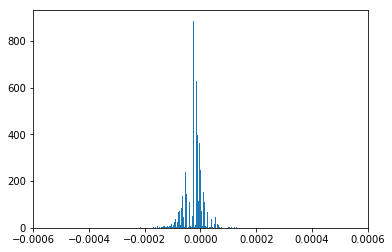

In [78]:
plt.hist(algo.coef_[0], bins=500)
plt.xlim([-0.0006, 0.0006])
plt.show()

** Какую выбрать метрику для регуляризации? **

In [83]:
algo = LogisticRegression(penalty='l1', C=0.1)
arr = cross_val_score(algo, sparse_feature_matrix, train_data.target, cv=5, scoring=f_scorer)
print(arr)
print(np.mean(arr))

C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[ 0.41684388  0.39465958  0.41908457  0.39169935  0.40437525]
0.405332526494


In [84]:
algo.fit(sparse_feature_matrix, train_data.target)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
f_scorer(algo, sparse_feature_matrix, train_data.target)

0.54798167087433247

In [86]:
f_scorer(algo, count_vectorizer.transform(test_data.data), test_data.target)

0.50416181235731572

Подберём оптимальное значение параметра регуляризации

In [87]:
def grid_plot(x, y, x_label, title, y_label='f_measure'):
    plt.figure(figsize=(12, 6))
    plt.grid(True),
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [88]:
print(*map(float, np.logspace(-2, 2, 10)))

0.01 0.027825594022071243 0.0774263682681127 0.21544346900318834 0.5994842503189409 1.6681005372000592 4.6415888336127775 12.915496650148826 35.93813663804626 100.0


In [90]:
lr_grid = {
    'C': np.logspace(-2, 2, 10),
}
gs = GridSearchCV(LogisticRegression(penalty='l2'), lr_grid, scoring=f_scorer, cv=5, n_jobs=5)
%time  gs.fit(sparse_feature_matrix, train_data.target)
print("best_params: {}, best_score: {}".format(gs.best_params_, gs.best_score_))

Wall time: 3.84 s
best_params: {'C': 0.027825594022071243}, best_score: 0.84823622776607


C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Рассмотрим график:

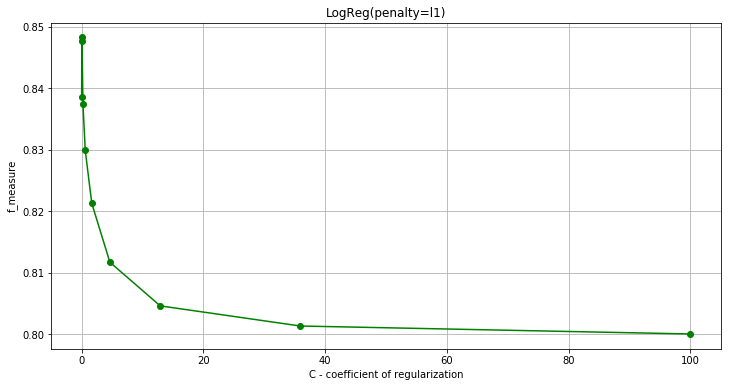

In [91]:
grid_plot(
    lr_grid['C'], gs.cv_results_['mean_test_score'], 'C - coefficient of regularization', 'LogReg(penalty=l1)'
)

In [97]:
lr_grid = {
    'C': np.linspace(0.001, 0.5, 40),
}
gs = GridSearchCV(LogisticRegression(penalty='l2'), lr_grid, scoring=f_scorer, cv=5, n_jobs=5)
%time  gs.fit(sparse_feature_matrix, train_data.target)
print("best_params: {}, best_score: {}".format(gs.best_params_, gs.best_score_))

Wall time: 9.28 s
best_params: {'C': 0.02658974358974359}, best_score: 0.8483652300106335


C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


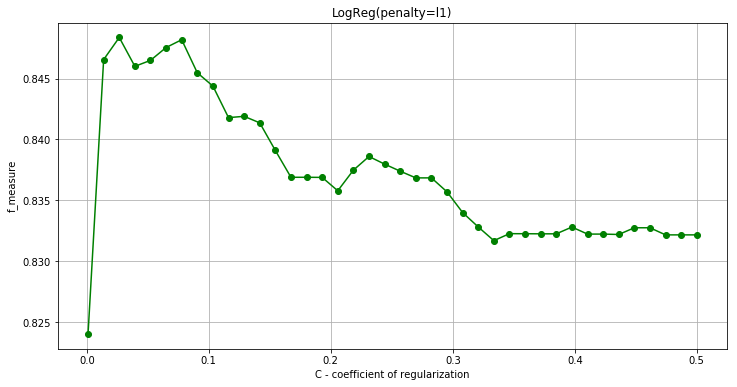

In [98]:
grid_plot(
    lr_grid['C'], gs.cv_results_['mean_test_score'], 'C - coefficient of regularization', 'LogReg(penalty=l1)'
)

In [99]:
    lr_final = LogisticRegression(penalty='l1', C=10)
%time lr_final.fit(sparse_feature_matrix, train_data.target)

Wall time: 104 ms


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
accuracy_score(lr_final.predict(sparse_feature_matrix), train_data.target)

0.97750281214848145

In [101]:
f_scorer(lr_final, sparse_feature_matrix, train_data.target)

0.97768055155088496

In [102]:
accuracy_score(lr_final.predict(count_vectorizer.transform(test_data.data)), test_data.target)

0.65765004226542689

In [103]:
f_scorer(lr_final, count_vectorizer.transform(test_data.data), test_data.target)

0.6593955461436446

## Регуляризация вместе с векторизацией признаков
Чтобы не делать векторизацию и обучение раздельно, есть удобный класс Pipeline. Он позволяет объединить в цепочку последовательность действий

In [104]:
from sklearn.pipeline import Pipeline

In [105]:
pipeline = Pipeline([
    ("vectorizer", CountVectorizer(min_df=5, ngram_range=(1, 2))),
    ("algo", LogisticRegression())
])

In [106]:
pipeline.fit(train_data.data, train_data.target)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=5,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('algo',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                   

In [107]:
f_scorer(pipeline, train_data.data, train_data.target)

0.98043637978682829

In [108]:
f_scorer(pipeline, test_data.data, test_data.target)

0.79302041945076363

Значения такие же как мы получали ранее, делая шаги раздельно.

In [109]:
from sklearn.pipeline import make_pipeline

При кроссвалидации нужно, чтобы CountVectorizer не обучался на тесте (иначе объекты становятся зависимыми). Pipeline позволяет это просто сделать.

In [110]:
pipeline = make_pipeline(CountVectorizer(min_df=5, ngram_range=(1, 2)), LogisticRegression())
arr = cross_val_score(pipeline, train_data.data, train_data.target, cv=5, scoring=f_scorer)
print(arr)
print(np.mean(arr))

C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[ 0.83746513  0.84655975  0.82308768  0.83985549  0.83173934]
0.835741477532


В Pipeline можно добавлять новые шаги препроцессинга данных

In [111]:
from sklearn.feature_extraction.text import TfidfTransformer

In [112]:
pipeline = make_pipeline(CountVectorizer(min_df=5, ngram_range=(1, 2)), TfidfTransformer(), LogisticRegression())
arr = cross_val_score(pipeline, train_data.data, train_data.target, cv=5, scoring=f_scorer)
print(arr)
print(np.mean(arr))

C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[ 0.8711115   0.8703129   0.8482986   0.85701424  0.84020672]
0.857388794386


In [113]:
pipeline.fit(train_data.data, train_data.target)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=5,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
              

In [114]:
accuracy_score(pipeline.predict(train_data.data), train_data.target)

0.96962879640044997

In [115]:
f_scorer(pipeline, train_data.data, train_data.target)

0.96977974559971047

In [116]:
accuracy_score(pipeline.predict(test_data.data), test_data.target)

0.82417582417582413

In [117]:
f_scorer(pipeline, test_data.data, test_data.target)

0.8250417787917681

Качество стало немного лучше

# Классификация сообщений чатов

В качестве задания предлагается построить модель классификации текстов, соответствующих сообщениям из чатов по ML, Python и знакомствам.

**Данные** можно взять с <a src="https://www.kaggle.com/c/tfstextclassification">соревнования на Kaggle</a>, проведенное в рамках курса "Диалоговые системы" в Тинькофф. Прямая [ссылка](https://www.dropbox.com/s/8wckwzfy63ajxpm/tfstextclassification.zip?dl=0) на скачивание.

In [11]:
data_path = 'data/{}'
df = pd.read_csv('data/train.csv')

### Первичный анализ данных

In [12]:
print(df.shape)

(112467, 3)


In [13]:
df.head()

,id,text,label
0,0,ж 44 позн с мужч от 40 лет 0678935919,1
1,1,уже и не вспомню где это увидел,2
2,2,", sep=';', decimal=',' может изза этого",2
3,3,НУЖНА ДЕВ ДЛЯ С\\О -19л.0637048428смс,1
4,4,.М54.ИЩУ Д.Ж. С-П.ДЛЯ ЛАСК...НЕКМ.0508665030....,1


In [14]:
label = 0
print('Label: ', label, '\n'+'='*100+'\n')
print(*df[df['label'] == label].sample(10).text, sep='\n'+'-'*100+'\n\n')

Label:  0 

А в чём загвоздка-то?
----------------------------------------------------------------------------------------------------

хм, приходит heart-beat': '10000,10000' но это все равно не в этом дело\nя не понял про слать heart beat
----------------------------------------------------------------------------------------------------

Стоит делать так, как удобно делать лично тебе или твоей команде. Если станет неудобно, переделаете рабочий процесс сразу же.
----------------------------------------------------------------------------------------------------

На си там только куски лексера и энкодера - https://github.com/python/cpython/blob/3.7/Modules/_json.c
----------------------------------------------------------------------------------------------------

    def __str__(self):\n        string_size = 20\n        name_string = str(self.name)\n        if len(name_string) > string_size:\n            name_string = name_string[0:string_size-3] + '...'\n        return '{:<10s}{:<20

In [15]:
label = 1
print('Label: ', label, '\n'+'='*100+'\n')
print(*df[df['label'] == label].sample(10).text, sep='\n'+'-'*100+'\n\n')

Label:  1 

ЛЮБИМЫЙ ЗНАЮ ЧТО МОЖНО НА ТРУБ.ПРИЕДУ НА НЕДЕЛЕ.ОЧЕНЬ СКУЧАЮ.КСЮНЯ
----------------------------------------------------------------------------------------------------

М.в годах. Хочу попробовать с женщиной. Днепр. 0666880067.
----------------------------------------------------------------------------------------------------

девушки  приезжайте в хорошую компанию.97 561 8200 97 561 8200
----------------------------------------------------------------------------------------------------

Девушки!кто хочет безумного вечера?Мужчина33.180.82.18см сначала смс0684361501
----------------------------------------------------------------------------------------------------

Зп/ШЕВЧИК.ХОЧУ МУЖЧИНУ СЕЙЧАС.СМС Предложения.0502526610
----------------------------------------------------------------------------------------------------

хочу познакомиться симпатичной девушкой 20-23 для с/о.0664778660.
---------------------------------------------------------------------------------------

In [16]:
label = 2
print('Label: ', label, '\n'+'='*100+'\n')
print(*df[df['label'] == label].sample(10).text, sep='\n'+'-'*100+'\n\n')

Label:  2 

Если интересно совсем с нуля\nто http://tryr.codeschool.com/\nтам прям совсем азы, и основы, но общее представление дает, хорошо еще, что онлайн, ставить не надо, можно потыкать, понять что не твое и отвалиться
----------------------------------------------------------------------------------------------------

Мне ж надо еще вспомнить, как их расставляли месяц с лишним назад :)
----------------------------------------------------------------------------------------------------

Ну не писать же в который раз, вот мы застакали 10  вариаций из 5 архитектур и получили золото на кэгле
----------------------------------------------------------------------------------------------------

Свод правил законов >> свод действий оператора ПК
----------------------------------------------------------------------------------------------------

А он разве ещё в бане?
----------------------------------------------------------------------------------------------------

да, кот здоровский, к

### Разделим данные на train/test

In [17]:
skf = StratifiedKFold(3, random_state=37)
train_index, test_index = next(skf.split(df.text, df.label))
train_df, test_df = df.iloc[train_index], df.iloc[test_index]
print(train_df.shape, test_df.shape)

(74977, 3) (37490, 3)


In [18]:
train_df.head()

,id,text,label
37334,37334,.Молодой красивый спортивный парень ищет серьё...,1
37335,37335,вы озабоченые уточняю для даши было написано:)...,1
37336,37336,КАБАСЯ Я ТЕБЯ ЛЮБЛЮ И ОЧЕНЬ СКУЧАЮ...ТВОЯ ВИТА...,1
37337,37337,парень ищет парня для и\\о 093 783 37 87,1
37339,37339,РОЗСЛАБЛЮ В НОЧНОЕ ВРЕМЯ ПО ТЕЛЕФОНУ.ЦЕНА 10Г....,1


In [19]:
test_df.head()

,id,text,label
0,0,ж 44 позн с мужч от 40 лет 0678935919,1
1,1,уже и не вспомню где это увидел,2
2,2,", sep=';', decimal=',' может изза этого",2
3,3,НУЖНА ДЕВ ДЛЯ С\\О -19л.0637048428смс,1
4,4,.М54.ИЩУ Д.Ж. С-П.ДЛЯ ЛАСК...НЕКМ.0508665030....,1


## Baseline

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from xgboost.sklearn import XGBClassifier

Преобразуем данные

In [84]:
X_train = train_df.text
y_train = train_df.label
print(X_train.shape)

X_test = test_df.text
y_test = test_df.label
print(X_test.shape)

(74977,)
(37490,)


Подготовим pipeline

In [85]:
pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("clf", DecisionTreeClassifier()),
])

Обучим классификатор

In [86]:
%%time
clf = pipeline
clf.fit(X_train, y_train)

CPU times: user 1min, sys: 398 ms, total: 1min 1s
Wall time: 1min 2s


Оценим качество

In [87]:
print("Train_acc: {:.4f}, train_f-measure: {:.4f}".format(
    accuracy_score(clf.predict(X_train), y_train),
    f_scorer(clf, X_train, y_train)
))

Train_acc: 0.9998, train_f-measure: 0.9998


In [88]:
print("Test_acc: {:.4f}, test_f-measure: {:.4f}".format(
    accuracy_score(clf.predict(X_test), y_test),
    f_scorer(clf, X_test, y_test)
))

Test_acc: 0.7898, test_f-measure: 0.7259


### Your turn

Как видим, наша модель переобучилась. Для получения лучших результатов попробуйте воспользоваться более хитрыми и походящими инструментами.

1. Попробуйте поработать с параметрами `CountVectorizer`.
2. Попробуйте воспользоваться TF-IDF для кодирования текстовой информации ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)).
3. Попробуйте воспользоваться другими моделями и средствами снижения размерности.

Формальный критерий успешности выполнения данного задания: 
* Проведен честный эксперимент с апробацией различных методов (>=3)
* Полученный алгоритм не выказывает явных следов переобучения (качество на train и test не различаются более, чем на 0.03 условных попугая)
* Test accuracy >= 0.835, f1-score >= 0.815

**0.5 extra points**

При частичном выполнении данного задания можно получить неполный балл. Качественный эксперимент, не побивший пороговые значения оценивается неполным баллом на усмотрение преподавателя. При получении пороговых score'ов случайным образом (без анализа) бонус не засчитывается. 